# Predictive Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from yellowbrick.classifier import ConfusionMatrix


In [6]:
# Read the data
df = pd.read_csv("C:\\Users\\thora\\Customer_Airways_Data.csv")

In [7]:
df = df.reset_index(drop=True)

In [8]:
df

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [9]:
# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[["sales_channel", "trip_type"]]).toarray()
feature_names = encoder.get_feature_names_out(["sales_channel", "trip_type"])
df_encoded = pd.concat([df, pd.DataFrame(encoded_features, columns=feature_names)], axis=1)


In [10]:
df_encoded 

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Drop unnecessary columns
df_encoded.drop(["Unnamed: 0","sales_channel", "trip_type", "booking_origin", "route"], axis=1, inplace=True)

In [16]:
# Split into X and y
X = df_encoded.drop("booking_complete", axis=1)
y = df_encoded["booking_complete"]


In [17]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def train_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def train_precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def train_recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

def train_f1 (y_true, y_pred):
    return f1_score(y_true, y_pred)

In [22]:
# Train the Random Forest Classifier
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)
clf_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

In [27]:
# Predict on test set and evaluate metrics

y_train_pred = clf_rf.predict(X_train_scaled)

# accuracy score for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# precision score for the training data
train_precision = precision_score(y_train, y_train_pred)

# recall score for the training data
train_recall = recall_score(y_train, y_train_pred)

# f1 score for the training data
train_f1 = f1_score(y_train, y_train_pred)

print(f"accuracy_score, precision_score, recall_score and f1_score for training data are {train_accuracy}, {train_precision}, {train_recall} and {train_f1} respectively")

accuracy_score, precision_score, recall_score and f1_score for training data are 0.9342253345004377, 0.999410551134689, 0.5633826216979565 and 0.7205694857628558 respectively


In [30]:
# Predict on test set and evaluate metrics

y_test_pred = clf_rf.predict(X_test_scaled)

# accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# precision score for the testing data
test_precision = precision_score(y_test, y_test_pred)

# recall score for the testing data
test_recall = recall_score(y_test, y_test_pred)

# f1 score for the testing data
test_f1 = f1_score(y_test, y_test_pred)

print(f"accuracy_score, precision_score, recall_score and f1_score for training data are {test_accuracy}, {test_precision}, {test_recall} and {test_f1} respectively")

accuracy_score, precision_score, recall_score and f1_score for training data are 0.8554566369910973, 0.5576923076923077, 0.03980782429649966 and 0.07431133888532993 respectively


0.8554566369910973

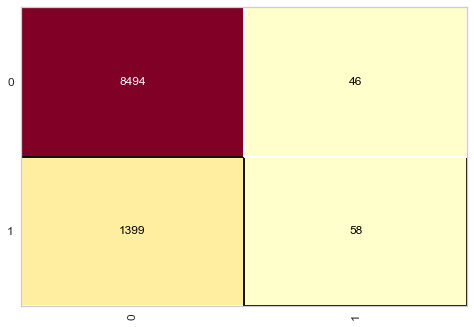

In [31]:
# Confusion matrix
cm = ConfusionMatrix(clf_rf, classes=[0, 1])
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)

Text(0.5, 0, 'Feature Importance')

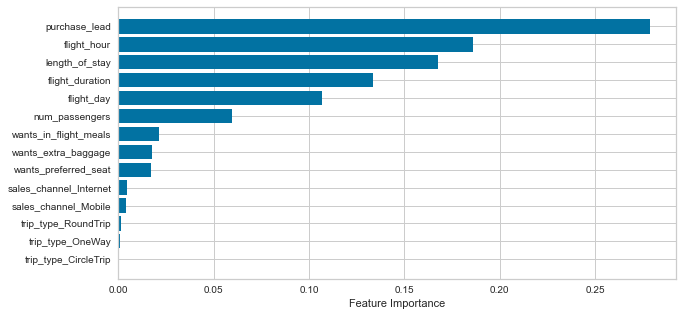

In [32]:
# Feature importances
plt.figure(figsize=(10, 5))
feature_importances = clf_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")